## Activity 4: Data Preparation and Cleaning for Credit card fraud detection

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
#Load the datasets 'fraudTrain.csv' and 'fraudTest.csv'
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

In [3]:
#Explore the data entries and shape of the datasets
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

print("\nTrain data preview:")
print(train_df.head())

print("\nTest data preview:")
print(test_df.head())

Train dataset shape: (1296675, 23)
Test dataset shape: (555719, 23)

Train data preview:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry

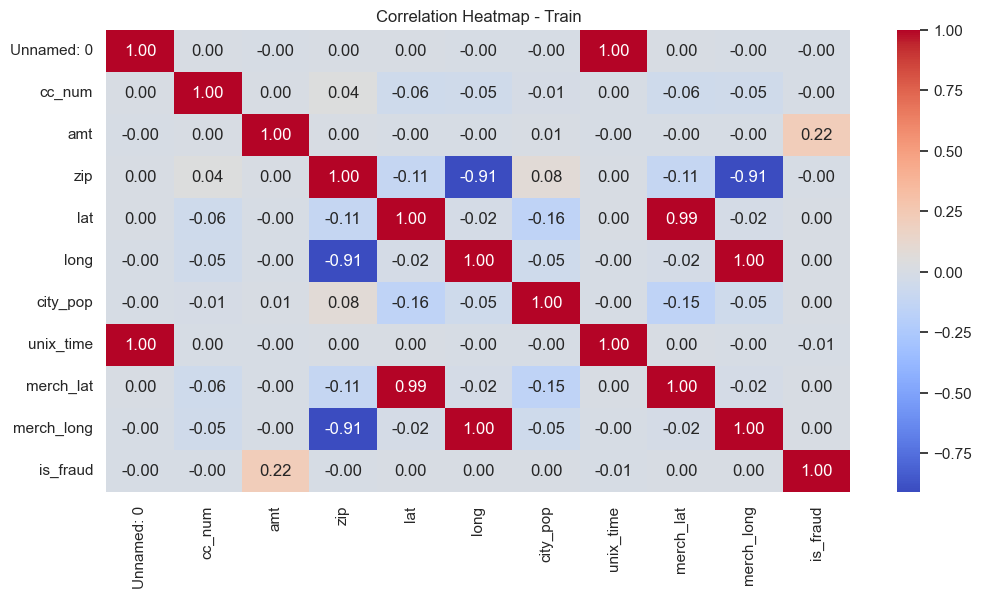

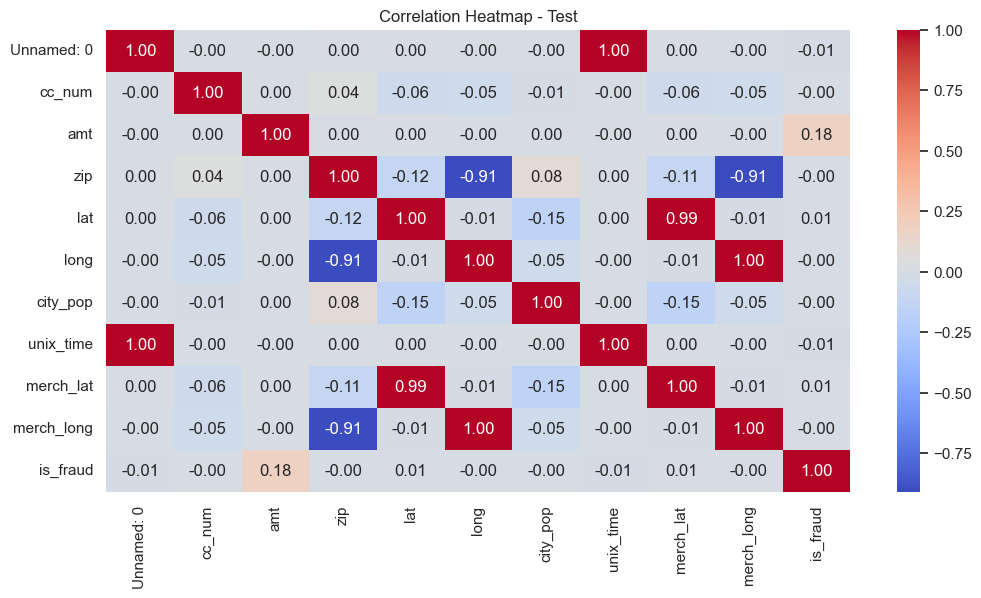

In [4]:
#Check the correlation between numerical features and plot heatmap in both datasets
train_corr = train_df.select_dtypes(include=np.number).corr()
test_corr = test_df.select_dtypes(include=np.number).corr()

# Heatmap for train dataset
plt.title("Correlation Heatmap - Train")
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Heatmap for test dataset
plt.title("Correlation Heatmap - Test")
sns.heatmap(test_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [5]:
#Drop unnecessary columns like 'Unnamed: 0'
train_df.drop(columns=["Unnamed: 0"], inplace=True)
test_df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
#Handle missing values and duplicate entries
# Check missing values
print("\nMissing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

# Drop duplicate entries
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)


Missing values in train dataset:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Missing values in test dataset:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
la

In [7]:
#Convert dob,trans_date_trans_time column in both test & train to datetime data type and creating new 'trans_date' column
for df in [train_df, test_df]:
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
    df['trans_date'] = df['trans_date_trans_time'].dt.date

In [8]:
#Check the Fraud and the Normal transaction numbers for test and train datasets
print("\nTrain dataset fraud vs normal:")
print(train_df['is_fraud'].value_counts())

print("\nTest dataset fraud vs normal:")
print(test_df['is_fraud'].value_counts())


Train dataset fraud vs normal:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Test dataset fraud vs normal:
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [9]:
#Merge train and test datasets for exploratory data analysis
from sklearn.model_selection import train_test_split

combined_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# Ambil 20.000 sampel, stratified agar distribusi fraud tetap proporsional
merged_df, _ = train_test_split(
    combined_df, stratify=combined_df['is_fraud'], test_size=0.90, random_state=42
)

print("\nMerged dataset shape:", merged_df.shape)


Merged dataset shape: (185239, 23)


## Activity 5: Exploratory Data Analysis (EDA)

C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1612490551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df[merged_df['category'].isin(top_categories.index)],


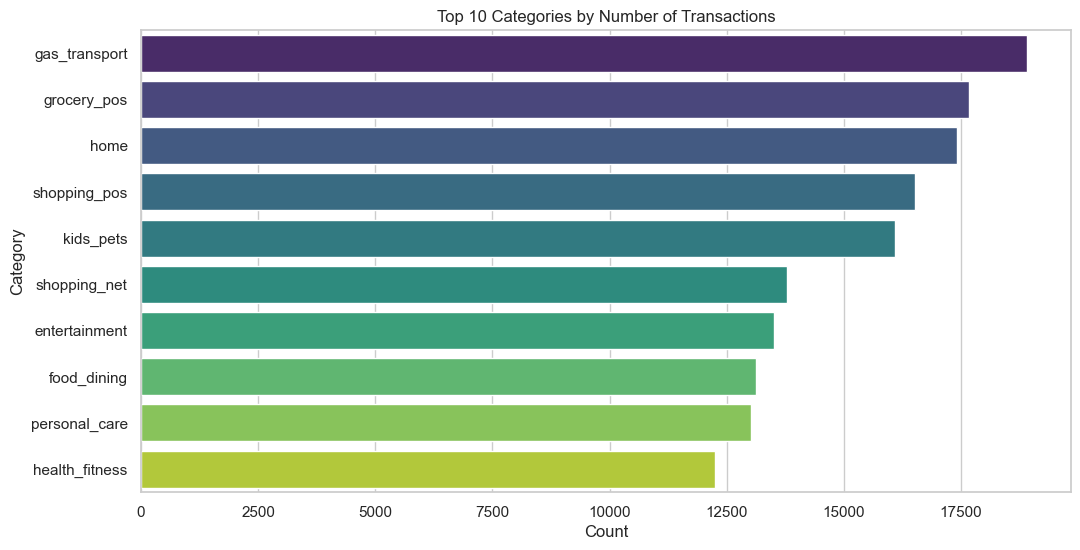

In [10]:
#Count plot of Transactions by top 10 Categories in merged datasets and provide the conclusions and insights gathered
top_categories = merged_df['category'].value_counts().nlargest(10)

sns.countplot(data=merged_df[merged_df['category'].isin(top_categories.index)],
              y='category', order=top_categories.index, palette='viridis')
plt.title("Top 10 Categories by Number of Transactions")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\2576334153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='gender', palette='Set2')


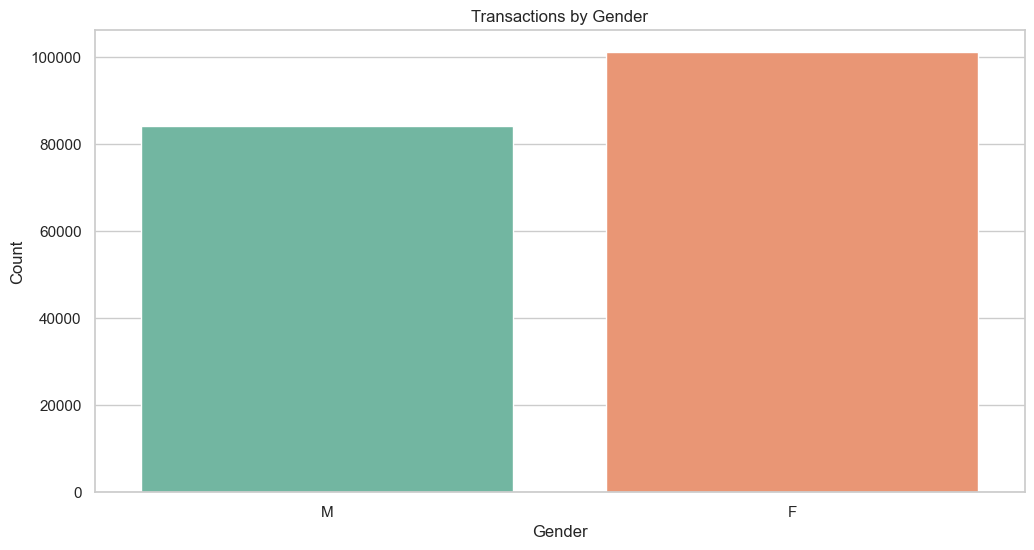

In [11]:
#Count plot of Transactions by Gender in merged datasets and provide the conclusions and insights gathered
sns.countplot(data=merged_df, x='gender', palette='Set2')
plt.title("Transactions by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\3099664626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df[merged_df['merchant'].isin(top_merchants.index)],


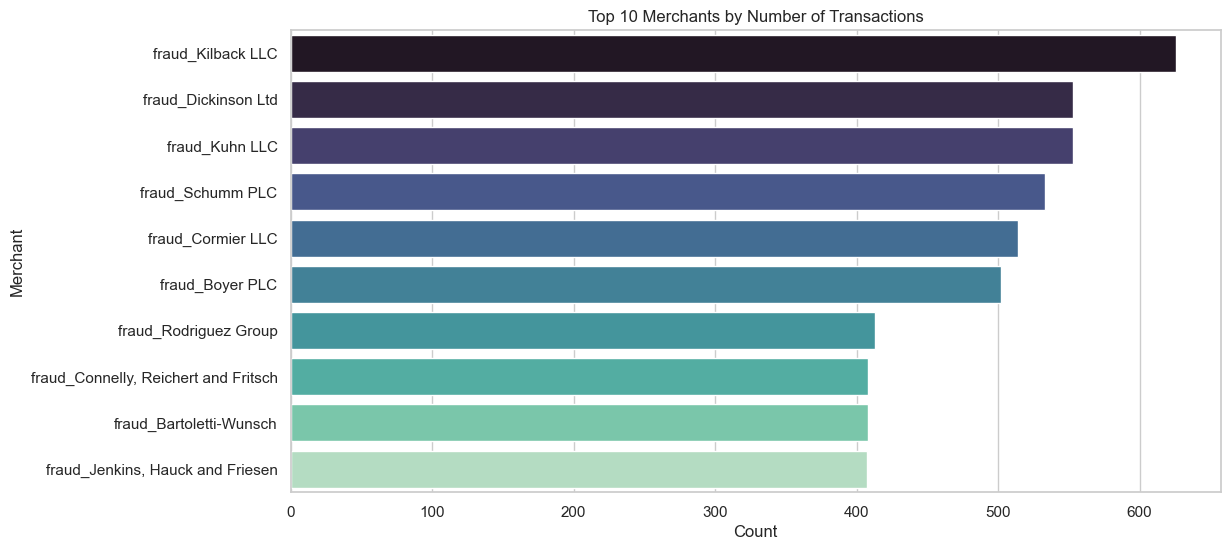

In [12]:
#Count plot of Transactions by top 10 Merchants in merged datasets and provide the conclusions and insights gathered
top_merchants = merged_df['merchant'].value_counts().nlargest(10)

sns.countplot(data=merged_df[merged_df['merchant'].isin(top_merchants.index)],
              y='merchant', order=top_merchants.index, palette='mako')
plt.title("Top 10 Merchants by Number of Transactions")
plt.xlabel("Count")
plt.ylabel("Merchant")
plt.show()

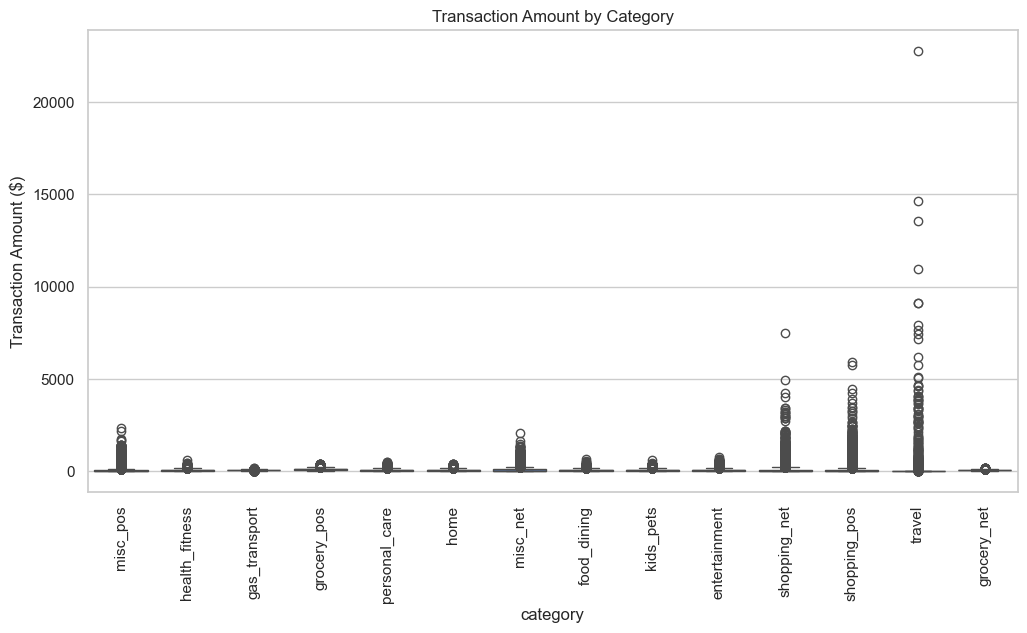

In [13]:
#Box plot of transaction amount by category and provide the conclusions and insights gathered
sns.boxplot(data=merged_df, x='category', y='amt')
plt.xticks(rotation=90)
plt.title("Transaction Amount by Category")
plt.ylabel("Transaction Amount ($)")
plt.show()

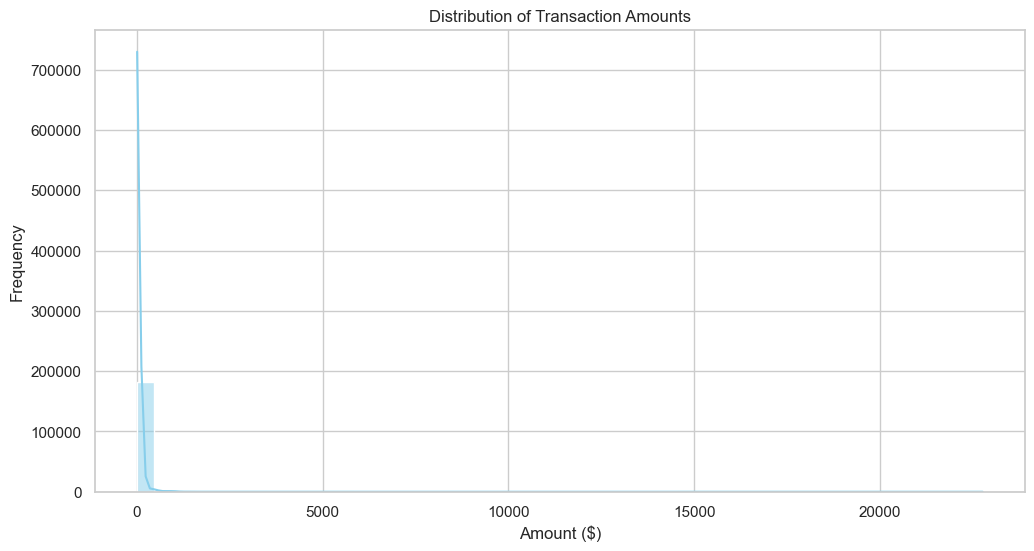

In [14]:
#A histogram of the transaction amount and provide the conclusions and insights gathered
sns.histplot(merged_df['amt'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1402468265.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df[fraud_df['category'].isin(top_fraud_categories.index)],


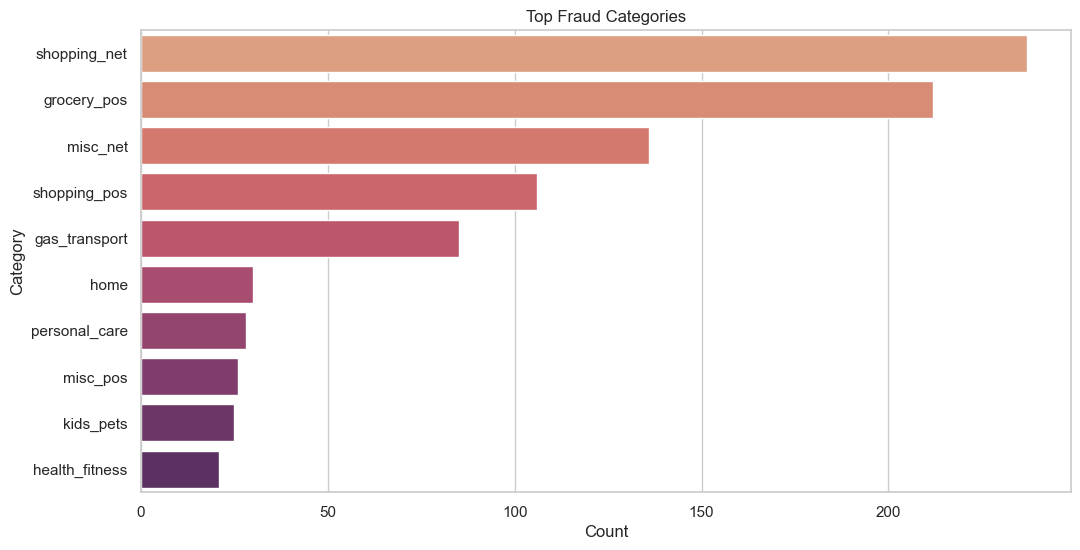

In [15]:
#Top Categories of the Fraudulent Transactions and provide the conclusions and insights gathered
fraud_df = merged_df[merged_df['is_fraud'] == 1]
top_fraud_categories = fraud_df['category'].value_counts().nlargest(10)

sns.countplot(data=fraud_df[fraud_df['category'].isin(top_fraud_categories.index)],
              y='category', order=top_fraud_categories.index, palette='flare')
plt.title("Top Fraud Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1169789616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_state.values, y=fraud_by_state.index, palette='magma')


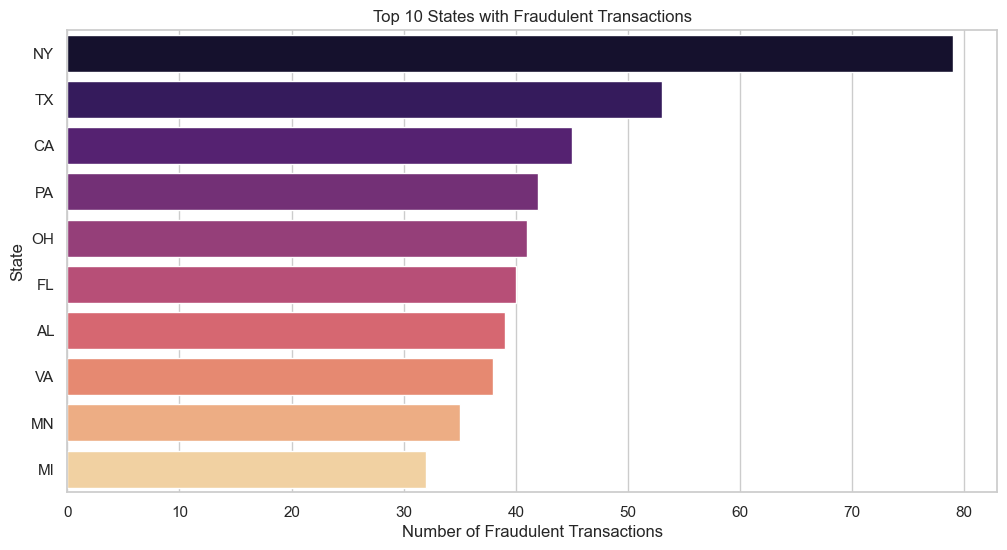

In [16]:
#State-wise Analysis of Fraudulent Transactions and provide the conclusions and insights gathered
fraud_by_state = fraud_df['state'].value_counts().nlargest(10)

sns.barplot(x=fraud_by_state.values, y=fraud_by_state.index, palette='magma')
plt.title("Top 10 States with Fraudulent Transactions")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("State")
plt.show()


C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\2961241669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_city.values, y=fraud_by_city.index, palette='rocket')


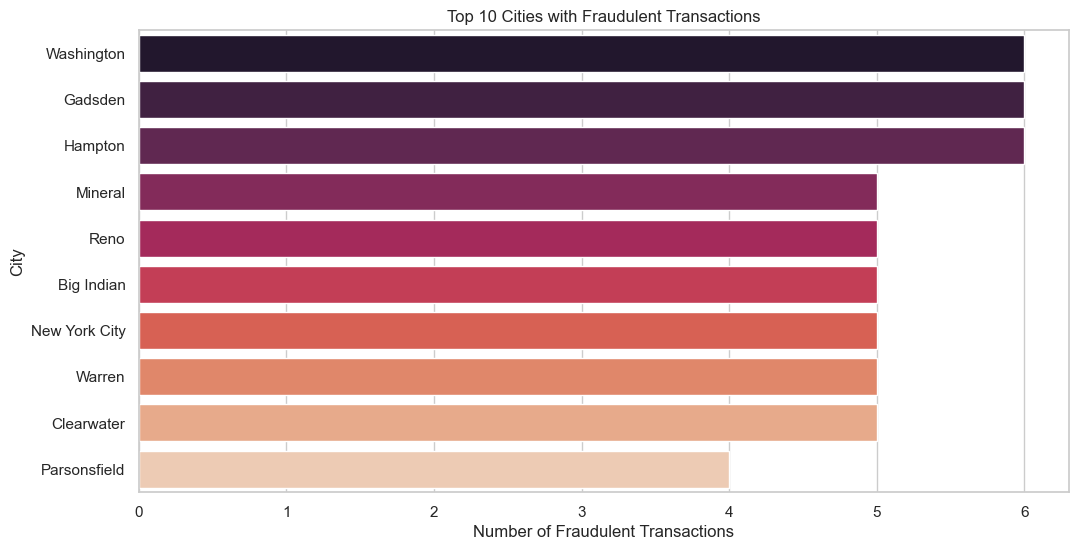

In [17]:
#City-wise Analysis of Fraudulent Transactions and provide the conclusions and insights gathered
fraud_by_city = fraud_df['city'].value_counts().nlargest(10)

sns.barplot(x=fraud_by_city.values, y=fraud_by_city.index, palette='rocket')
plt.title("Top 10 Cities with Fraudulent Transactions")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("City")
plt.show()


C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1173081517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_job.values, y=fraud_by_job.index, palette='cool')


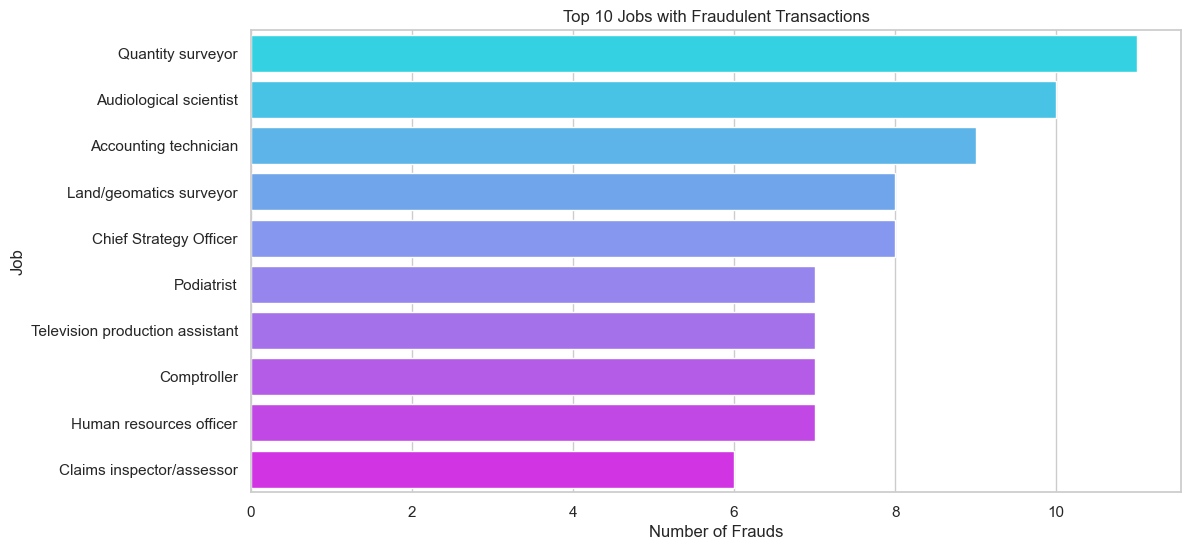

In [18]:
#Number of Credit Card Frauds by Job and provide the conclusions and insights gathered
fraud_by_job = fraud_df['job'].value_counts().nlargest(10)

sns.barplot(x=fraud_by_job.values, y=fraud_by_job.index, palette='cool')
plt.title("Top 10 Jobs with Fraudulent Transactions")
plt.xlabel("Number of Frauds")
plt.ylabel("Job")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1448392865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['age'] = (pd.to_datetime('2020-01-01') - fraud_df['dob']).dt.days // 365
C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1448392865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['age_group'] = pd.cut(fraud_df['age'], bins=[18, 25, 35, 45, 55, 65, 100],
C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1448392865.py:9: FutureWarning: 

Passing `palette` without assigning 

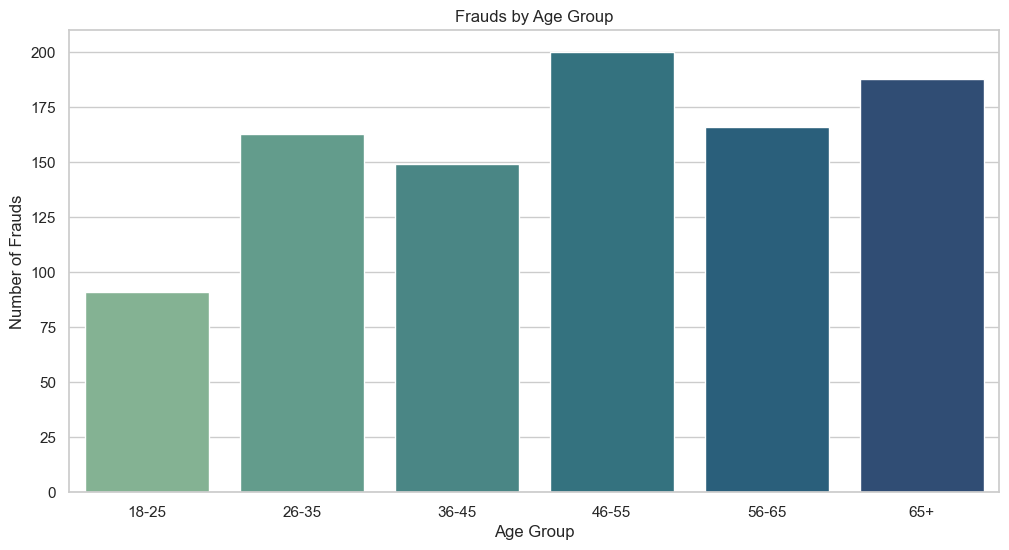

In [19]:
#Number of Credit Card Frauds by Age Groups and provide the conclusions and insights gathered
# Hitung usia
fraud_df['age'] = (pd.to_datetime('2020-01-01') - fraud_df['dob']).dt.days // 365

# Buat kelompok usia
fraud_df['age_group'] = pd.cut(fraud_df['age'], bins=[18, 25, 35, 45, 55, 65, 100],
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

sns.countplot(data=fraud_df, x='age_group', palette='crest')
plt.title("Frauds by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Frauds")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\3307500141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='gender', palette='Set3')


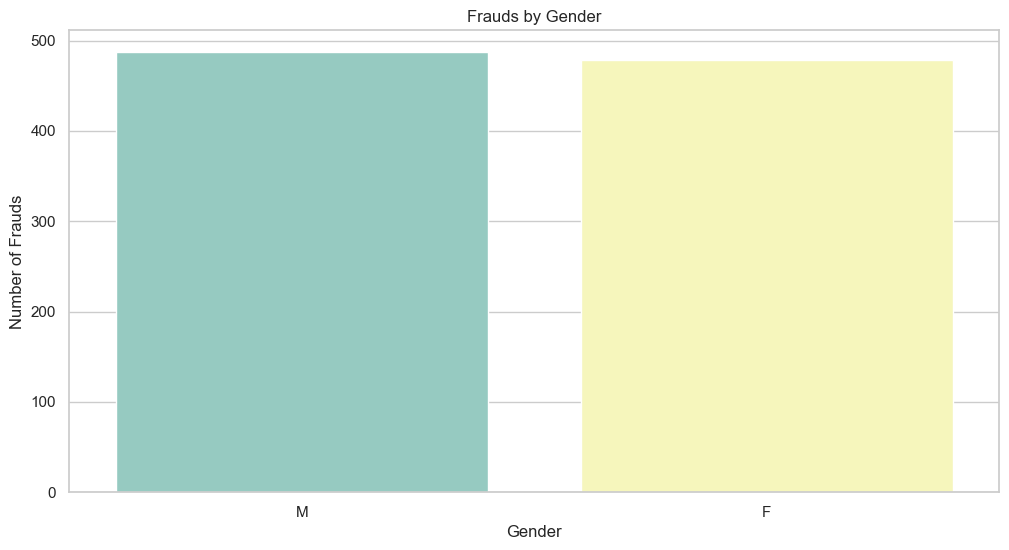

In [20]:
#Number of Credit Card Frauds by Gender and provide the conclusions and insights gathered
sns.countplot(data=fraud_df, x='gender', palette='Set3')
plt.title("Frauds by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Frauds")
plt.show()


C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1918859655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['year'] = pd.to_datetime(fraud_df['trans_date_trans_time']).dt.year
C:\Users\romdh\AppData\Local\Temp\ipykernel_12580\1918859655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='year', palette='YlGnBu')


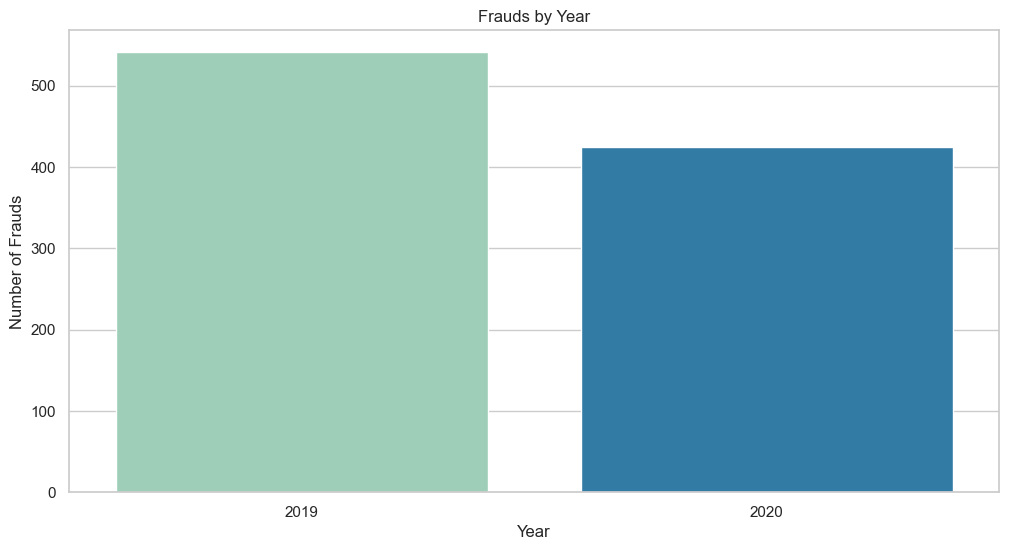

In [21]:
#Number of Credit Card Frauds by Year and provide the conclusions and insights gathered
fraud_df['year'] = pd.to_datetime(fraud_df['trans_date_trans_time']).dt.year

sns.countplot(data=fraud_df, x='year', palette='YlGnBu')
plt.title("Frauds by Year")
plt.xlabel("Year")
plt.ylabel("Number of Frauds")
plt.show()

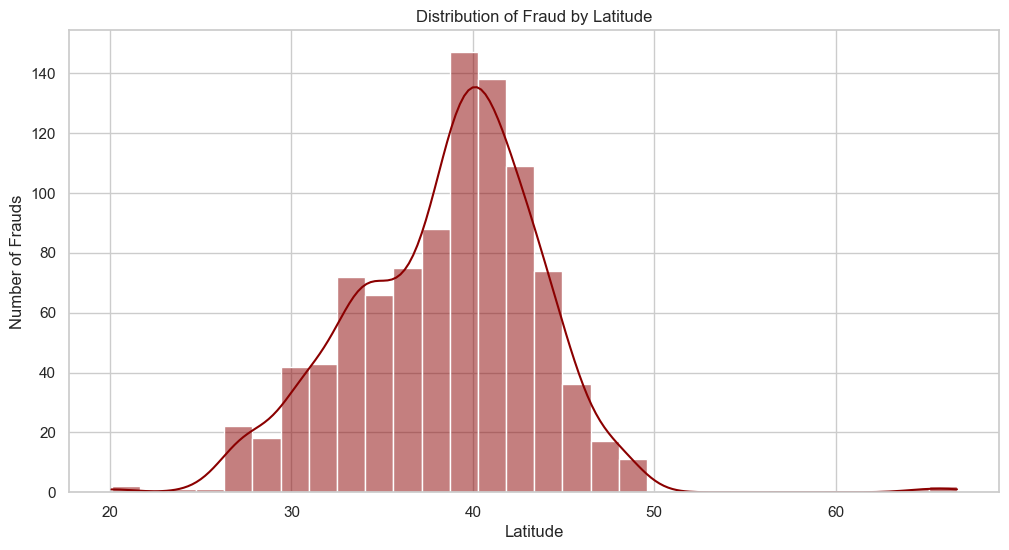

In [22]:
#Number of Credit Card Frauds by latitudinal distance and provide the conclusions and insights gathered
sns.histplot(fraud_df['lat'], bins=30, kde=True, color='darkred')
plt.title("Distribution of Fraud by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Number of Frauds")
plt.show()

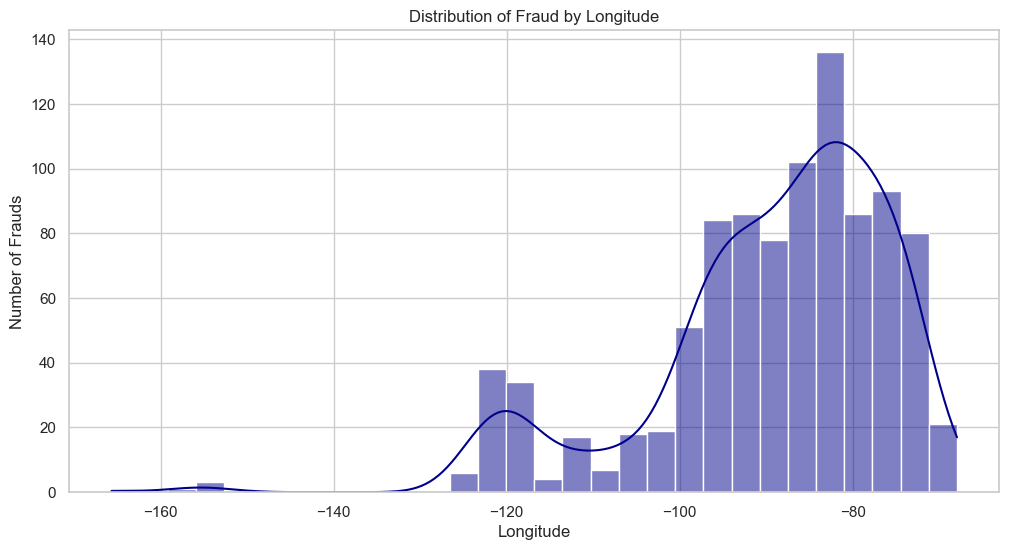

In [23]:
#Number of Credit Card Frauds by longitudinal distance and provide the conclusions and insights gathered
sns.histplot(fraud_df['long'], bins=30, kde=True, color='darkblue')
plt.title("Distribution of Fraud by Longitude")
plt.xlabel("Longitude")
plt.ylabel("Number of Frauds")
plt.show()

## Activity 6: Feature Engineering

In [24]:
#Encode categorical variables using techniques suitable for the model, such as one-hot encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Salin dataframe untuk diproses
df = merged_df.copy()

# One-hot encode untuk 'category' dan 'gender'
df = pd.get_dummies(df, columns=['category', 'gender'], drop_first=True)


In [25]:
#Drop highly correlated or redundant features to reduce dimensionality
redundant_cols = ['trans_date_trans_time', 'trans_date', 'dob', 'unix_time',
                  'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'trans_num']
df.drop(columns=redundant_cols, inplace=True, errors='ignore')

In [26]:
#Label encode categorical features
if df['job'].dtype == 'object':
    le = LabelEncoder()
    df['job'] = le.fit_transform(df['job'])

In [27]:
#Normalize or standardize numerical features to improve model performance
from sklearn.preprocessing import StandardScaler

# Tambahkan kolom 'age' berdasarkan kolom dob
df['age'] = (pd.to_datetime("2020-01-01") - pd.to_datetime(merged_df['dob'])).dt.days // 365

# Normalisasi fitur numerik
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long', 'zip', 'age']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [28]:
#Save the final dataset as 'Capstone_Dataset.csv'
df.to_csv("Capstone_Dataset.csv", index=False)

## Activity 7: Model Training and Evaluation

In [29]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Fitur & label
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Stratified split agar distribusi fraud seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Li

In [30]:
#Train a logistic regression, Decision Tree, Random Forest, Adaboost, GaussianNB, KNN classifier, and LightGBM Classifier, model to predict fraudulent transactions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

# Model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier()
}

# Latih semua model
trained_models = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = model

[LightGBM] [Info] Number of positive: 147419, number of negative: 147419
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2983
[LightGBM] [Info] Number of data points in the train set: 294838, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [31]:
#Evaluate the model using metrics such as accuracy, precision, recall, and the F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n Model Evaluation Metrics:\n")

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f" {name}")
    print(f"   - Accuracy : {acc:.4f}")
    print(f"   - Precision: {prec:.4f}")
    print(f"   - Recall   : {rec:.4f}")
    print(f"   - F1-score : {f1:.4f}\n")


 Model Evaluation Metrics:

 Logistic Regression
   - Accuracy : 0.8828
   - Precision: 0.0339
   - Recall   : 0.7824
   - F1-score : 0.0650

 Decision Tree
   - Accuracy : 0.9947
   - Precision: 0.4910
   - Recall   : 0.7098
   - F1-score : 0.5805

 Random Forest
   - Accuracy : 0.9970
   - Precision: 0.7015
   - Recall   : 0.7306
   - F1-score : 0.7157

 AdaBoost
   - Accuracy : 0.9467
   - Precision: 0.0794
   - Recall   : 0.8705
   - F1-score : 0.1455

 GaussianNB
   - Accuracy : 0.5559
   - Precision: 0.0095
   - Recall   : 0.8187
   - F1-score : 0.0188

 KNN
   - Accuracy : 0.9923
   - Precision: 0.3715
   - Recall   : 0.6891
   - F1-score : 0.4828



c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 LightGBM
   - Accuracy : 0.9909
   - Precision: 0.3526
   - Recall   : 0.8860
   - F1-score : 0.5044



In [32]:
#Utilize confusion matrix and classification reports to assess performance
from sklearn.metrics import confusion_matrix, classification_report

print("\n Confusion Matrices & Classification Reports:\n")

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4, zero_division=0)

    print(f" {name}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    print("-" * 60)



 Confusion Matrices & Classification Reports:

 Logistic Regression
Confusion Matrix:
 [[32556  4299]
 [   42   151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.8834    0.9375     36855
           1     0.0339    0.7824    0.0650       193

    accuracy                         0.8828     37048
   macro avg     0.5163    0.8329    0.5013     37048
weighted avg     0.9937    0.8828    0.9330     37048

------------------------------------------------------------
 Decision Tree
Confusion Matrix:
 [[36713   142]
 [   56   137]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9985    0.9961    0.9973     36855
           1     0.4910    0.7098    0.5805       193

    accuracy                         0.9947     37048
   macro avg     0.7448    0.8530    0.7889     37048
weighted avg     0.9958    0.9947    0.9951     37048

-----------------------------------------------------

c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Activity 8: Model Optimization and Finalization

In [33]:
#Perform hyperparameter tuning using techniques like GridSearchCV to find the best model parameters on each of the machine learning algorithms used in Milestone-4.

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# K-Fold cross-validation stratifikasi
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Dictionary parameter untuk setiap model
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1],
        "solver": ["liblinear"]
    },
    "Decision Tree": {
        "max_depth": [5, 10],
        "min_samples_split": [2]
    },
    "Random Forest": {
        "n_estimators": [50],
        "max_depth": [10]
    },
    "AdaBoost": {
        "n_estimators": [50],
        "learning_rate": [1.0]
    },
    "KNN": {
        "n_neighbors": [3],
        "weights": ['uniform']
    },
    "LightGBM": {
        "n_estimators": [50],
        "num_leaves": [31]
    }
}

In [34]:
#Choose the correct parameter search space and hyperparameters for each of the ML Algorithms.
best_models = {}
best_scores = {}

for name, model in trained_models.items():
    print(f"Tuning model: {name}")
    param_grid = param_grids.get(name)
    
    if param_grid:
        grid = GridSearchCV(model, param_grid, scoring='f1', cv=cv, n_jobs=-1)
        grid.fit(X_train_resampled, y_train_resampled)
        
        best_models[name] = grid.best_estimator_
        best_scores[name] = grid.best_score_
        
        print(f"  Best Params: {grid.best_params_}")
        print(f"  Best F1 Score (CV): {grid.best_score_:.4f}\n")
    else:
        print(f"  Tidak ada parameter grid untuk: {name}\n")

Tuning model: Logistic Regression
  Best Params: {'C': 1, 'solver': 'liblinear'}
  Best F1 Score (CV): 0.8228

Tuning model: Decision Tree
  Best Params: {'max_depth': 10, 'min_samples_split': 2}
  Best F1 Score (CV): 0.9751

Tuning model: Random Forest
  Best Params: {'max_depth': 10, 'n_estimators': 50}
  Best F1 Score (CV): 0.9487

Tuning model: AdaBoost
  Best Params: {'learning_rate': 1.0, 'n_estimators': 50}
  Best F1 Score (CV): 0.9267

Tuning model: GaussianNB
  Tidak ada parameter grid untuk: GaussianNB

Tuning model: KNN
  Best Params: {'n_neighbors': 3, 'weights': 'uniform'}
  Best F1 Score (CV): 0.9956

Tuning model: LightGBM
[LightGBM] [Info] Number of positive: 147419, number of negative: 147419
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2983
[LightGBM] [Info] Num

In [35]:
#Evaluate the best model on the test dataset to ensure it generalises well
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    final_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Hasil evaluasi akhir
final_df = pd.DataFrame(final_results).sort_values(by='F1 Score', ascending=False)
display(final_df)

c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score
4,KNN,0.994440,0.475285,0.647668,0.548246
2,Random Forest,0.989608,0.314672,0.844560,0.458509
5,LightGBM,0.983859,0.231788,0.906736,0.369198
1,Decision Tree,0.965180,0.119889,0.896373,0.211491
3,AdaBoost,0.946745,0.079395,0.870466,0.145518
0,Logistic Regression,0.882882,0.033948,0.782383,0.065072


In [36]:
#Document the model development process and results.
import joblib

best_final_model_name = final_df.iloc[0]['Model']
best_final_model = best_models[best_final_model_name]

# Simpan model dan scaler
joblib.dump(best_final_model, 'best_final_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"Model terbaik: {best_final_model_name}")
print("Model dan scaler telah disimpan.")

Model terbaik: KNN
Model dan scaler telah disimpan.


## Activity 9: Building and Evaluating a DNN Model

In [37]:
#Import TensorFlow Keras libraries for model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
#Import scikit-learn libraries for evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
#Initialize a Sequential model
model = Sequential()

In [40]:
#Add a Dense layer with 128 units and 'relu' activation, specifying input shape
model.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))

c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
#Add a Dense layer with 64 units and 'relu' activation
model.add(Dense(64, activation='relu'))

In [42]:
#Add a Dense layer with 32 units and 'relu' activation
model.add(Dense(32, activation='relu'))

In [43]:
#Add a final Dense layer with 1 unit and 'sigmoid' activation
model.add(Dense(1, activation='sigmoid'))

In [44]:
#Compile the model using 'binary_crossentropy' as the loss function
#Use 'adam' as the optimizer
#Include 'accuracy' in the metrics
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [45]:
#Call the summary method to display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 13,441 (52.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#Train the model
# Konfigurasi training yang akan diuji
configs = [(10, 32), (20, 32), (10, 64), (20, 64)]

# Simpan hasil tiap training
results = []

In [47]:
#Set different epochs and batch sizes and compare the results with each value
for epochs, batch_size in configs:
    print(f"\nTraining with {epochs} epochs and batch size {batch_size}")

    # Inisialisasi ulang model setiap konfigurasi
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

    results.append({
        'Epochs': epochs,
        'Batch Size': batch_size,
        'Test Loss': test_loss,
        'Test Accuracy': test_accuracy
    })

    # Simpan prediksi untuk analisis selanjutnya
    y_pred_probs = model.predict(X_test_scaled)
    y_pred = (y_pred_probs > 0.5).astype(int)


Training with 10 epochs and batch size 32
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Training with 20 epochs and batch size 32
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Training with 10 epochs and batch size 64
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Training with 20 epochs and batch size 64
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [48]:
#Print the test loss and accuracy for each trained mode
# Tampilkan hasil evaluasi setiap kombinasi
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='Test Accuracy', ascending=False))

,Epochs,Batch Size,Test Loss,Test Accuracy
3,20,64,0.034480,0.994413
1,20,32,0.040625,0.993009
2,10,64,0.035882,0.992442
0,10,32,0.036400,0.991713


In [49]:
#Print the confusion matrix comparing y_test and predicted values
# Confusion matrix terakhir dari loop di atas (bisa ditampilkan di setiap loop jika ingin)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[36698   157]
 [   50   143]]


In [50]:
#Print the classification report to evaluate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36855
           1       0.48      0.74      0.58       193

    accuracy                           0.99     37048
   macro avg       0.74      0.87      0.79     37048
weighted avg       1.00      0.99      1.00     37048



## Activity 10: Data Preparation and Visualization for Gender Classifier

In [57]:
#Download and Extract Data: Use Python’s zipfile module to extract images from two ZIP archives: Training.zip and Validation.zip
import zipfile
import os

# Ekstrak Training.zip
with zipfile.ZipFile('Training.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train')

# Ekstrak Validation.zip
with zipfile.ZipFile('Validation.zip', 'r') as zip_ref:
    zip_ref.extractall('data/valid')

In [58]:
#Set Up Directories: Organize images into two main directories (train and valid), and within each, further categorize them into subdirectories based on male and female classes.
import shutil
import os

# Pindahkan isi dari train/Training ke train/
for category in ['male', 'female']:
    src = os.path.join('data/train/Training', category)
    dst = os.path.join('data/train', category)
    shutil.move(src, dst)

# Pindahkan isi dari valid/Validation ke valid/
for category in ['male', 'female']:
    src = os.path.join('data/valid/Validation', category)
    dst = os.path.join('data/valid', category)
    shutil.move(src, dst)

# Hapus folder kosong jika perlu
shutil.rmtree('data/train/Training')
shutil.rmtree('data/valid/Validation')

In [59]:
#File Check: Use os.listdir to verify the presence and correct count of images in each directory
def count_images(directory):
    for category in ['male', 'female']:
        folder = os.path.join(directory, category)
        count = len(os.listdir(folder))
        print(f"{directory} - {category}: {count} images")

count_images('data/train')
count_images('data/valid')

data/train - male: 14453 images
data/train - female: 13841 images
data/valid - male: 3485 images
data/valid - female: 3321 images


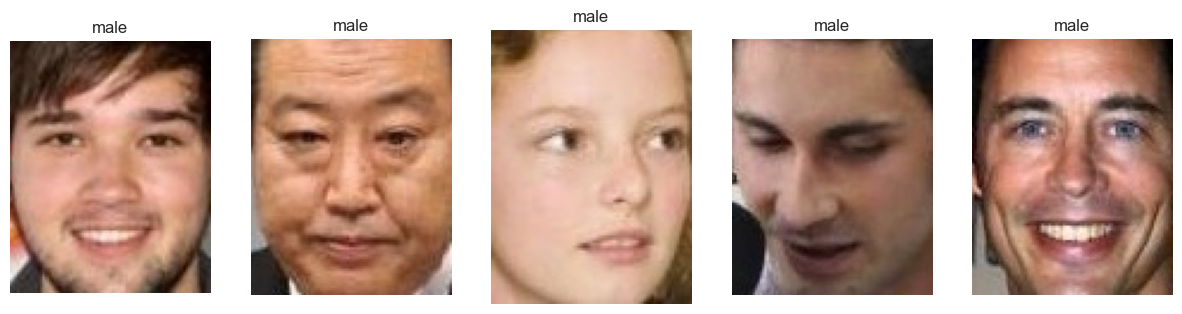

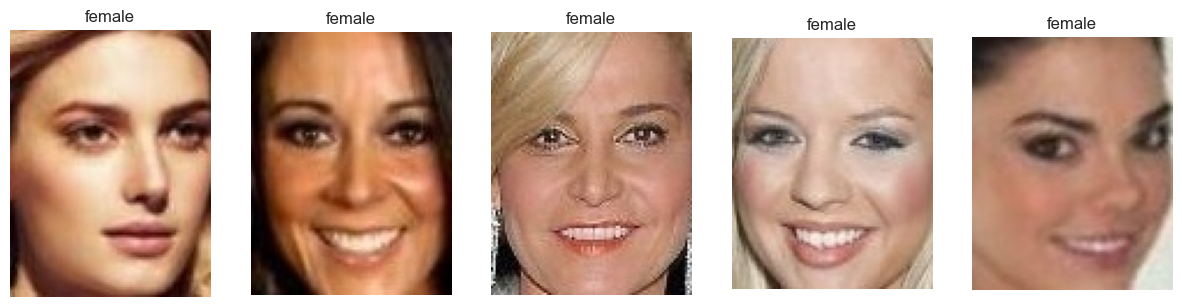

In [60]:
#Sample Visualization:Visualize few sample images from the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_sample_images(directory, category, num=5):
    folder = os.path.join(directory, category)
    images = random.sample(os.listdir(folder), num)

    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(images):
        img_path = os.path.join(folder, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

# Contoh visualisasi
show_sample_images('data/train', 'male', num=5)
show_sample_images('data/train', 'female', num=5)

In [61]:
#Image Resizing: Standardize images to 200x200 pixels using TensorFlow's tf.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator untuk preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [62]:
#Data Normalization: Normalize image pixel values to the range 0-1 as part of data preprocessing within ImageDataGenerator
# Flow from directory untuk train dan valid
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    'data/valid',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 28294 images belonging to 2 classes.
Found 6806 images belonging to 2 classes.


## Activity 11: Model Building, Compilation and Training for Gender Classifier

In [63]:
#CNN Architecture Design: Define a CNN with layers using tf.keras.layers, including Conv2D for convolutional layers,MaxPooling2D for pooling layers, and Dense layers for classification. (Refer the Sample Model Architecture Below, you can explore any different architecture for better performance)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
#Model Compilation: Compile the CNN model using the Adam optimizer, binary cross-entropy as the loss function, and accuracy as the metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
#Summarize Model: Use the model.summary() method to print the model architecture and verify the setup
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,768,833 (33.45 MB)

 Trainable params: 8,768,833 (33.45 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
#Model Training: Fit the model on the training data generated by ImageDataGenerator, using batches and validating with a separate validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    'data/train', target_size=(200, 200), batch_size=32, class_mode='binary'
)

valid_data = valid_gen.flow_from_directory(
    'data/valid', target_size=(200, 200), batch_size=32, class_mode='binary'
)

# Training
history = model.fit(train_data, validation_data=valid_data, epochs=10)

Found 28294 images belonging to 2 classes.
Found 6806 images belonging to 2 classes.


c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 1180s 1s/step - accuracy: 0.8198 - loss: 0.3788 - val_accuracy: 0.9168 - val_loss: 0.1969
Epoch 2/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 797s 901ms/step - accuracy: 0.9325 - loss: 0.1745 - val_accuracy: 0.9417 - val_loss: 0.1530
Epoch 3/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 783s 884ms/step - accuracy: 0.9470 - loss: 0.1334 - val_accuracy: 0.9502 - val_loss: 0.1333
Epoch 4/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 780s 882ms/step - accuracy: 0.9623 - loss: 0.1019 - val_accuracy: 0.9545 - val_loss: 0.1269
Epoch 5/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 779s 879ms/step - accuracy: 0.9718 - loss: 0.0745 - val_accuracy: 0.9562 - val_loss: 0.1252
Epoch 6/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 777s 878ms/step - accuracy: 0.9824 - loss: 0.0512 - val_accuracy: 0.9525 - val_loss: 0.1680
Epoch 7/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 769s 869ms/step - accuracy: 0.9866 - loss: 0.0413 - val_accuracy: 0.9517 - val_loss: 0.1694
Epoch 8/10
885/885 ━━━━━━━━━━━━━━━━━━━━ 769s 869ms/step - accuracy: 0.9906 - l

In [67]:
#Model Evaluation: Use the validation set to calculate final model performance metrics such as accuracy, precision, and recal
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

213/213 ━━━━━━━━━━━━━━━━━━━━ 56s 261ms/step - accuracy: 0.9596 - loss: 0.2124
Validation Loss: 0.2085, Validation Accuracy: 0.9586


213/213 ━━━━━━━━━━━━━━━━━━━━ 52s 243ms/step


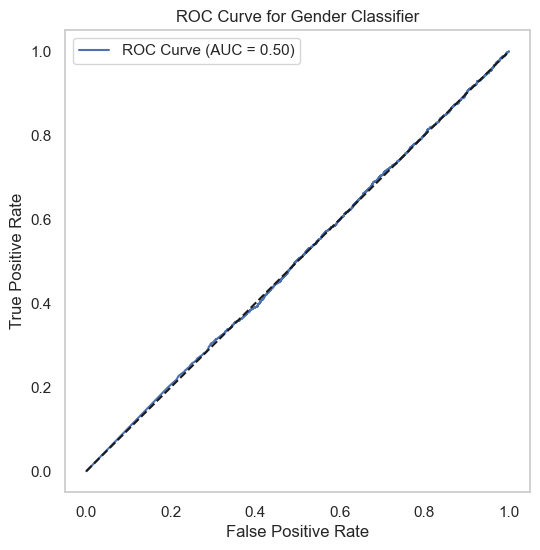

In [68]:
#ROC Curve Analysis: Generate and plot the Receiver Operating Characteristic (ROC) curve using sklearn.metrics.roc_curve and calculate the area under the curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Ambil prediksi probabilitas
y_probs = model.predict(valid_data)
y_true = valid_data.classes

fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gender Classifier')
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


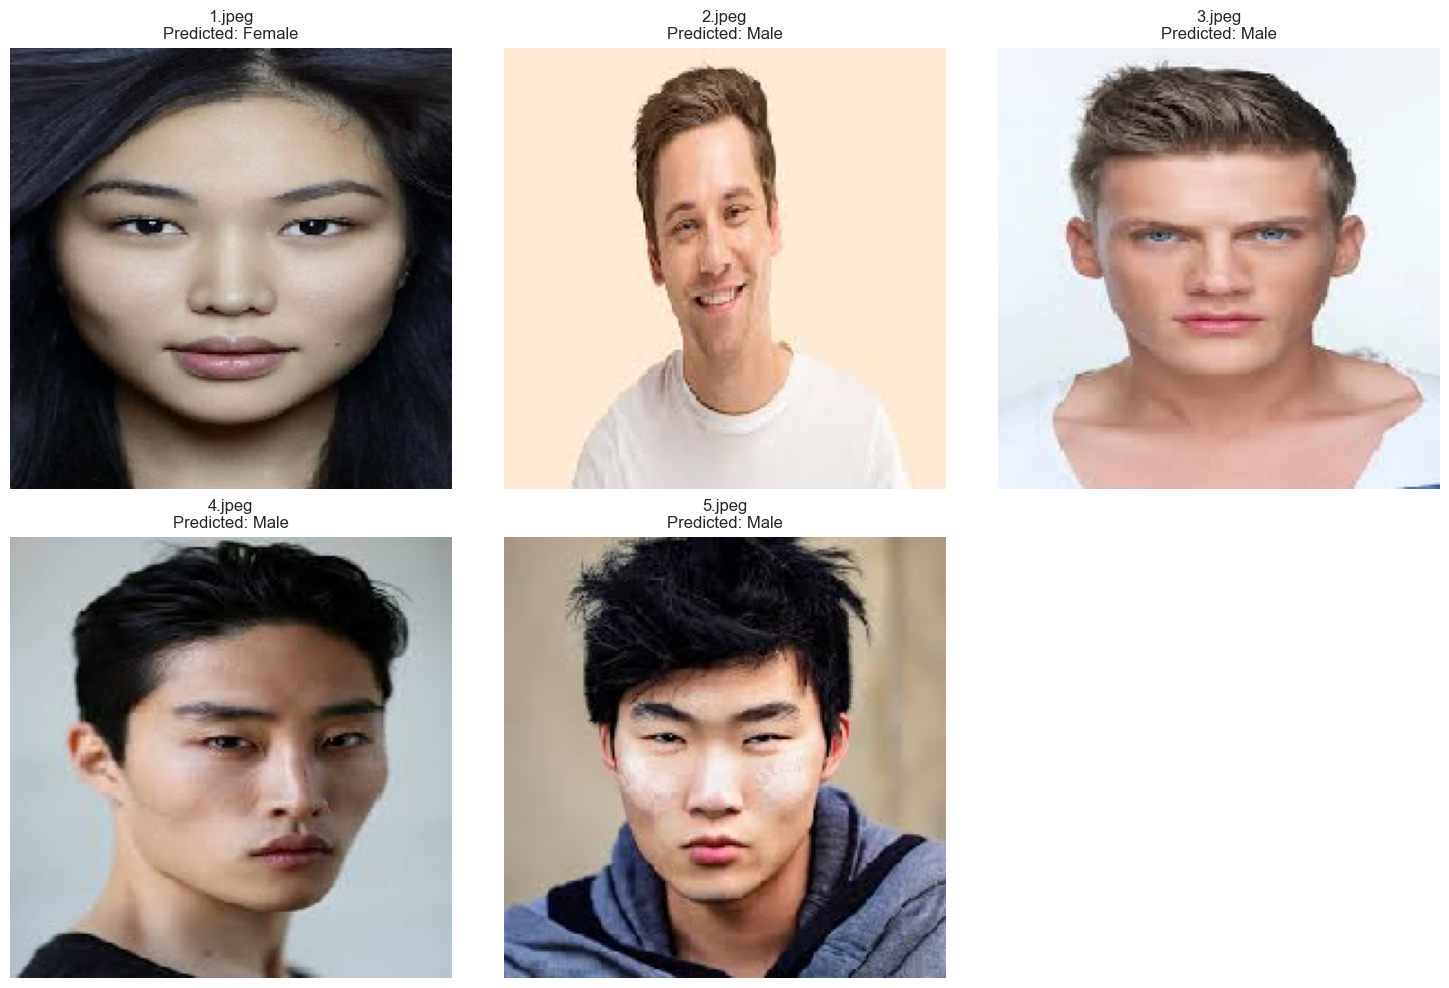

In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_and_display_images(test_folder):
    img_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(img_files):
        img_path = os.path.join(test_folder, img_file)

        try:
            # Load and preprocess image
            img = image.load_img(img_path, target_size=(200, 200))
            img_array = image.img_to_array(img) / 255.0
            img_array_exp = np.expand_dims(img_array, axis=0)

            # Predict
            prediction = model.predict(img_array_exp)
            predicted_label = 'Male' if prediction[0][0] > 0.5 else 'Female'

            # Plot image with label
            plt.subplot(2, 3, i + 1)
            plt.imshow(img_array)
            plt.title(f'{img_file}\nPredicted: {predicted_label}')
            plt.axis('off')

        except Exception as e:
            print(f"Error with image {img_file}: {e}")

    plt.tight_layout()
    plt.show()

# Jalankan
predict_and_display_images('test')